# Завдання

https://djinni.notion.site/djinni/2022-4f3e4a1bfcd54ea6a46ab4d66e120b2d

Залишились запитання?

Пиши нам в телеграм:

- Макс @maxua
- Оля (ПМ) @olha_lukianova

## Частина 1

У вас є дата-сет з даними про найми у 2020-му році, а також певною інформацією про кандидатів та компаніі.

Ваша задача - проаналізувати їх, описати ситуацію на ринку, знайти цікаві залежності та будь-які інсати, які на вашу думку допоможуть продукту розвиватись або будуть цікавими для наших користувачів *(кандидатів та роботодавців).* Описати результат.

Першу частину завдання можна виконувати за допомогою будь-якого BI-інструменту чи мови програмування, презентувати як ви вважаєте за потрібне *(графіки в Excel, дешборд в Tableau, інтерактивний віджет - будь-що)*

Записати loom-відео на 3-5 хвилин з поясненням як ви підійшли до вирішення завдання та чому саме ці інсайти вважаєте найважливішими. 

[test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/8845a467-4586-470b-8c93-80f0ab70be43/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv)

### Load libraries

In [1]:
!git clone https://github.com/Mykrass/Viz-function-for-statistical-data-analysis.git

Cloning into 'Viz-function-for-statistical-data-analysis'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 155 (delta 22), reused 0 (delta 0), pack-reused 111
Receiving objects: 100% (155/155), 1.70 MiB | 5.91 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
!ls -GFlash --color ./Viz-function-for-statistical-data-analysis/

total 44K
4.0K drwxr-xr-x 3 root 4.0K Sep  6 15:59 ./
4.0K drwxr-xr-x 1 root 4.0K Sep  6 15:59 ../
4.0K -rw-r--r-- 1 root  518 Sep  6 15:59 creating_table_jinni_script.sql
 12K -rw-r--r-- 1 root  11K Sep  6 15:59 customer_function.py
4.0K drwxr-xr-x 8 root 4.0K Sep  6 15:59 .git/
4.0K -rw-r--r-- 1 root 1.8K Sep  6 15:59 .gitignore
4.0K -rw-r--r-- 1 root   78 Sep  6 15:59 README.md
4.0K -rw-r--r-- 1 root  988 Sep  6 15:59 test_question_1.sql
4.0K -rw-r--r-- 1 root  621 Sep  6 15:59 test_question_2.sql


In [3]:
# Customer_function from git repository
!cat ./Viz-function-for-statistical-data-analysis/customer_function.py

#
import os
import sys
import missingno as mno
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics

# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# data quality   
def data_quality(df, column):  #convert_dtypes_with_reduce_memory(df)
    # datetime
    df[column] = pd.to_datetime(df[column], utc=True, infer_datetime_format=True)
    # any duplicate time periods?
    print("count of duplicates:",df.duplicated(subset=[column], keep="first").sum())
    # any non-numeric types?
    print("non-numeric columns:",list(df.dtypes[df.dtypes == "object"].index))
    
    
    
# any missing values?
def printing_missing_values(df):
    if df.isnull().values.any():
        print("MISSING values:\n")
        mno.matrix(df)
    else:
        print("no missing values\n")
    
    
    
# drop th

In [4]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mno

from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics

#
sys.path.append('/content/Viz-function-for-statistical-data-analysis')
import customer_function

### Load Data

In [5]:
!wget https://www.dropbox.com/s/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv

--2022-09-06 15:59:06--  https://www.dropbox.com/s/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv [following]
--2022-09-06 15:59:07--  https://www.dropbox.com/s/raw/uaazpg066li0gez/test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc964e72136331017bb1bac7baea.dl.dropboxusercontent.com/cd/0/inline/BsdTATFJVrnEAMAfJ7hRZD36Fx6yQdSBiNH7CyorrC8CF6y6RDe1Vg7yUmBHJKEmAcyxkT8nxvYhjRmlJITShReeK5I6ZDVILFyUZsfmnAzgRH_i7XVksJyVkvzuzI0MKdct-EnxApqDgSYZaJ9Gjgh2J-4ifZbB-gNCIpY5O_nUJw/file# [following]


In [6]:
!head test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv

candidate_id,hire_reported,primary_keyword_candidate,candidates_city,candidates_country,experience_years,en_level_candidate,hire_salary,company_type
67101,2020-01-08T18:54:32+02:00,Lead,Киев,Ukraine,11.0,upper,3500,outsource/outstaff
232534,2020-02-07T17:45:39+02:00,JavaScript,Киев,Ukraine,8.0,upper,6000,product
201076,2020-01-19T13:44:39+02:00,iOS,Запорожье,Ukraine,0.5,intermediate,800,
217961,2020-02-19T01:56:20+02:00,Design,Киев,Ukraine,3.0,intermediate,800,other
233372,2020-02-11T15:53:41+02:00,Design,,Ukraine,6.0,fluent,2000,product
165954,2020-01-30T17:55:13+02:00,QA Automation,Киев,Ukraine,2.0,upper,2500,outsource/outstaff
21041,2020-02-11T15:50:13+02:00,SQL,Киев,Ukraine,6.0,upper,2000,outsource/outstaff
229922,2020-02-11T15:23:16+02:00,PHP,Киев,Ukraine,10.0,intermediate,3500,outsource/outstaff
19626,2020-01-16T11:49:40+02:00,JavaScript,Львов,Ukraine,11.0,fluent,3000,


### Data cleaning

In [7]:
#
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import missingno as mno

df= pd.read_csv('test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv', parse_dates=["hire_reported"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   candidate_id               7951 non-null   int64  
 1   hire_reported              7951 non-null   object 
 2   primary_keyword_candidate  7706 non-null   object 
 3   candidates_city            6525 non-null   object 
 4   candidates_country         7948 non-null   object 
 5   experience_years           7951 non-null   float64
 6   en_level_candidate         7706 non-null   object 
 7   hire_salary                7951 non-null   int64  
 8   company_type               3730 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 559.2+ KB


count of duplicates: 5
non-numeric columns: ['primary_keyword_candidate', 'candidates_city', 'candidates_country', 'en_level_candidate', 'company_type']
MISSING values:



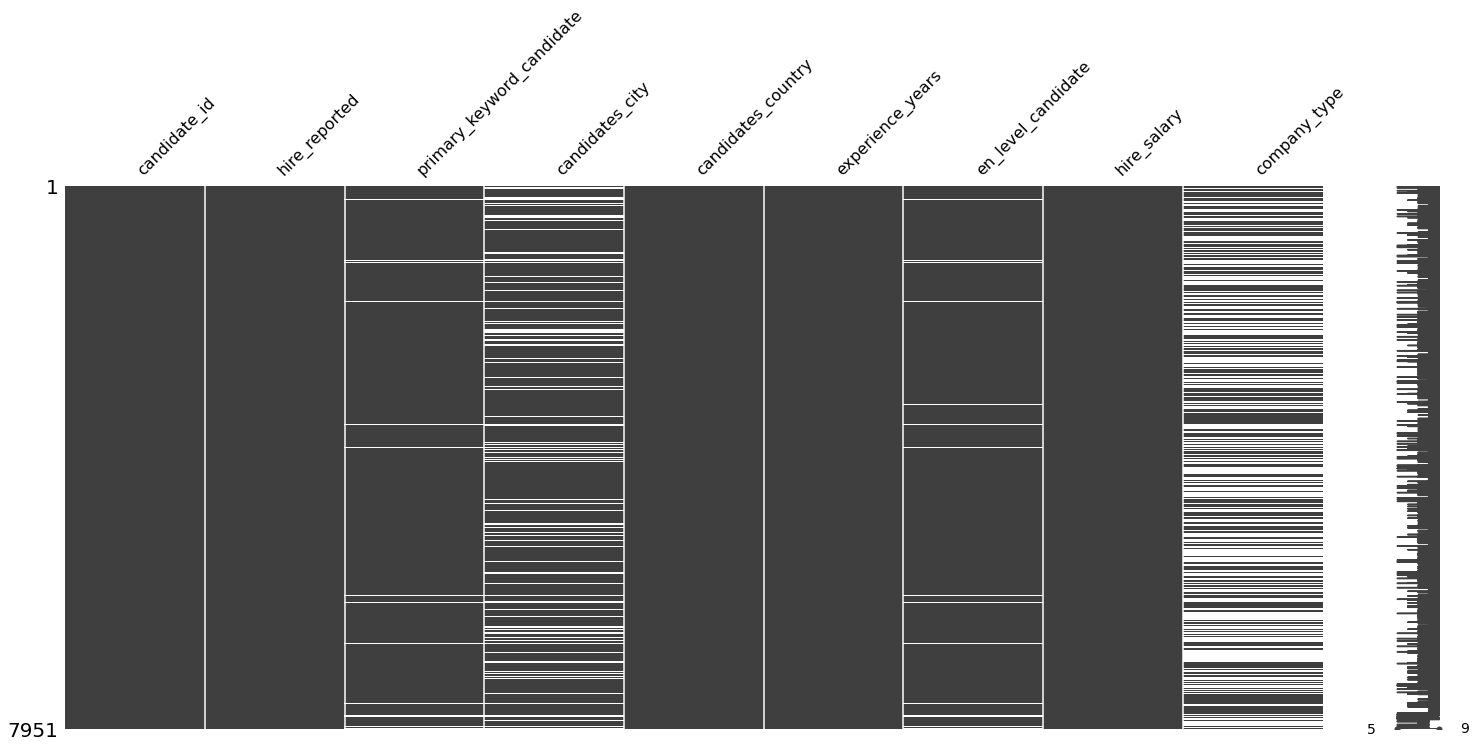

In [8]:
# Using customer_function from git repository
customer_function.data_quality(df, 'hire_reported')
customer_function.printing_missing_values(df)

MISSING values:



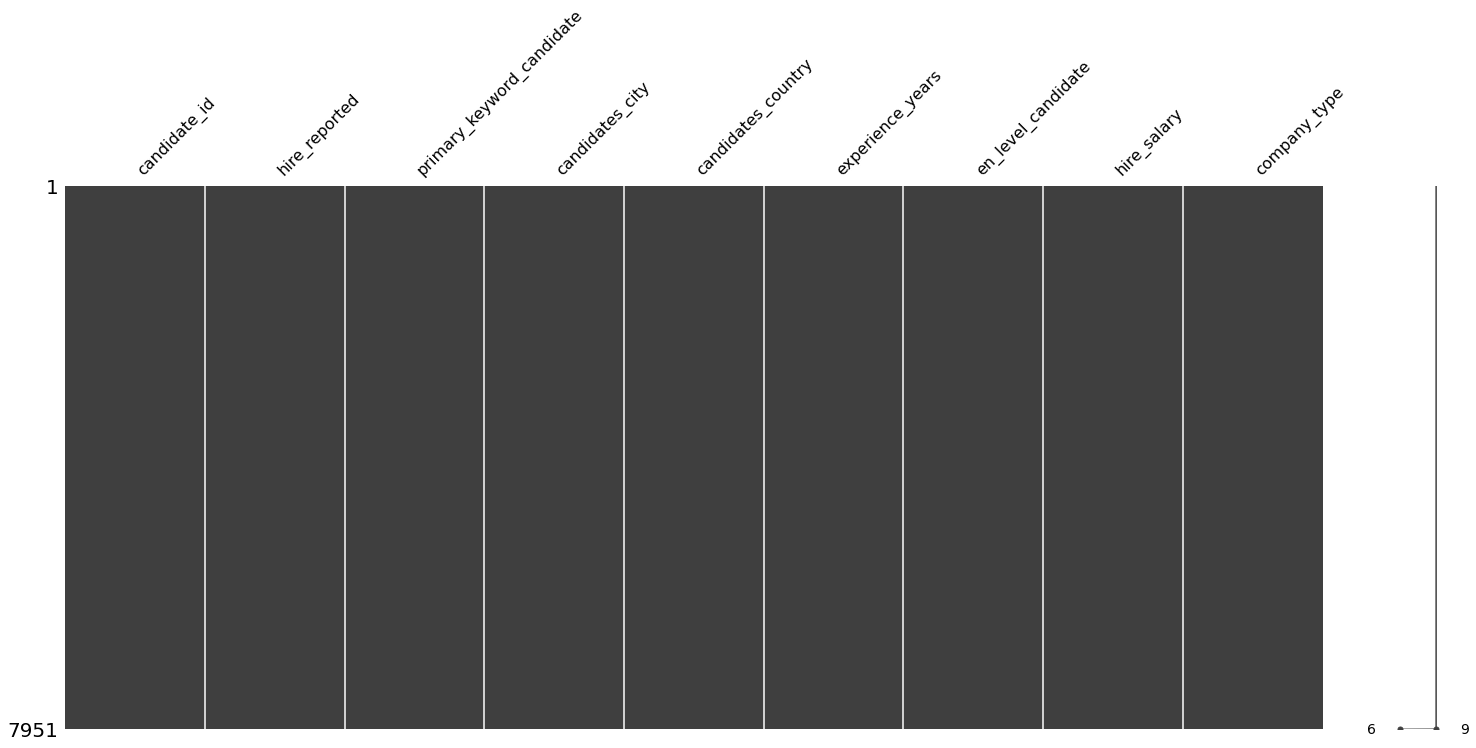

In [9]:
# Using customer_function from git repository
customer_function.data_cleaning(df)

In [10]:
from collections import Counter
Counter(df['en_level_candidate'])

Counter({'upper': 3167,
         'intermediate': 2401,
         'fluent': 1398,
         nan: 245,
         'pre': 623,
         'basic': 111,
         'no english': 4,
         'no_english': 2})

In [11]:
# Using customer_function from git repository
customer_function.data_cleaning_with_vocabulary(df, 'en_level_candidate')

Unique values: ['upper' 'intermediate' 'fluent' 'pre' 'basic']


In [12]:
# Using customer_function from git repository
customer_function.add_time_futures(df, 'hire_reported')

# using custiomer function from git for convert int and float64 columns to float32
customer_function.convert_dtypes_with_reduce_memory(df)

earliest time period: 2020-01-01 10:13:25+00:00
latest time period: 2020-12-30 21:20:14.323059+00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3094 entries, 2020-01-01 10:13:25+00:00 to 2020-12-30 21:20:14.323059+00:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   candidate_id               3094 non-null   float32
 1   primary_keyword_candidate  3094 non-null   object 
 2   candidates_city            3094 non-null   object 
 3   candidates_country         3094 non-null   object 
 4   experience_years           3094 non-null   float32
 5   en_level_candidate         3094 non-null   object 
 6   hire_salary                3094 non-null   float32
 7   company_type               3094 non-null   object 
 8   month                      3094 non-null   float32
 9   wday                       3094 non-null   float32
 10  weekday                    3094 non-null   object 
 11  hour

In [13]:
df

,candidate_id,primary_keyword_candidate,candidates_city,candidates_country,experience_years,en_level_candidate,hire_salary,company_type,month,wday,weekday,hour
hire_reported,,,,,,,,,,,,
2020-01-01 10:13:25+00:00,161883.0,Golang,Киев,Ukraine,1.0,pre,500.0,product,1.0,2.0,Wed,10.0
2020-01-02 10:40:18+00:00,88015.0,QA Automation,Киев,Ukraine,4.0,intermediate,3000.0,product,1.0,3.0,Thu,10.0
2020-01-02 10:42:43+00:00,137789.0,Node.js,Киев,Ukraine,2.0,intermediate,1700.0,outsource/outstaff,1.0,3.0,Thu,10.0
2020-01-02 11:32:26+00:00,177095.0,Android,Киев,Ukraine,3.0,fluent,2500.0,outsource/outstaff,1.0,3.0,Thu,11.0
2020-01-02 11:56:37+00:00,247717.0,Java,Киев,Ukraine,4.0,upper,4000.0,outsource/outstaff,1.0,3.0,Thu,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 14:08:56.391684+00:00,305959.0,JavaScript,Киев,Ukraine,4.0,fluent,2500.0,outsource/outstaff,12.0,2.0,Wed,14.0
2020-12-30 14:20:54.037710+00:00,2673.0,.NET,Киев,Ukraine,9.0,upper,4000.0,outsource/outstaff,12.0,2.0,Wed,14.0
2020-12-30 14:21:34.157574+00:00,92224.0,JavaScript,Киев,Ukraine,5.0,upper,0.0,outsource/outstaff,12.0,2.0,Wed,14.0


### DataViz Statiscical Analysis

Аналізуючи графіки змінних, можемо побачити що змінна ʼhiring_salaryʼ має аномалії.

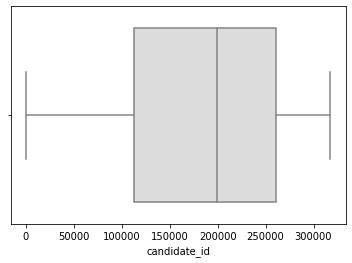

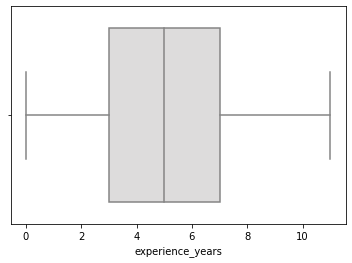

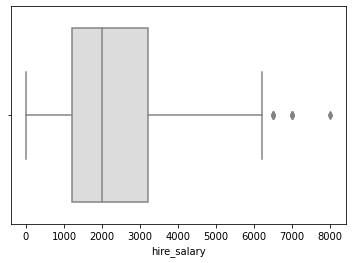

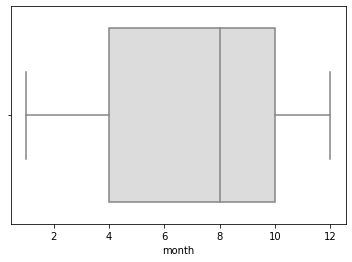

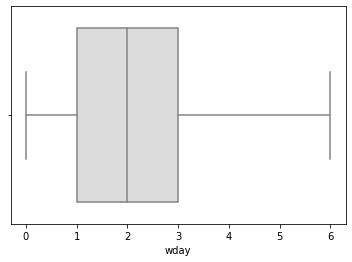

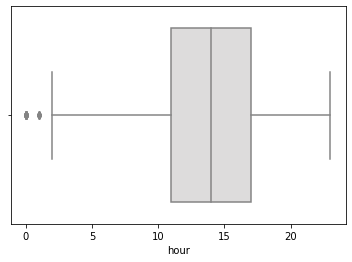

In [14]:
# Using customer_function from git repository
customer_function.printing_boxplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



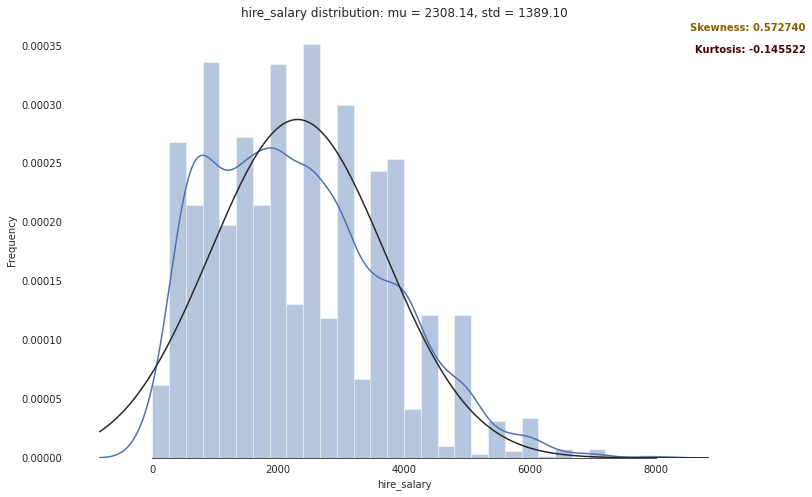

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



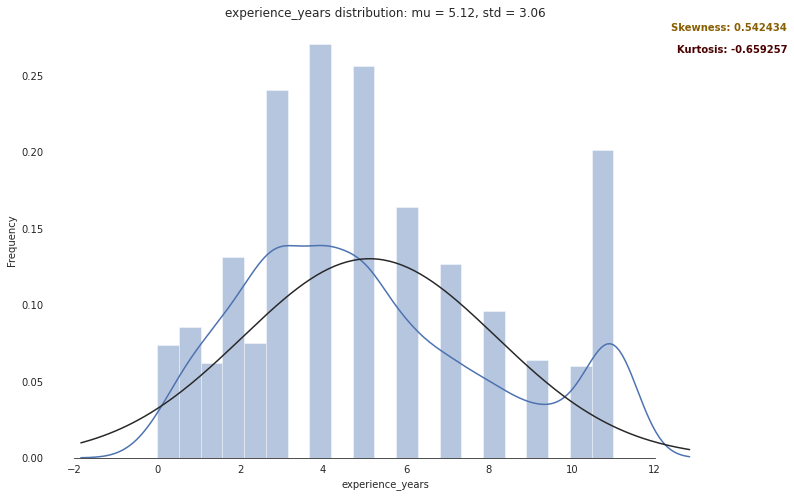

In [15]:
# Using customer_function from git repository
customer_function.printing_distribution_skewness_kurtosis(df, 'hire_salary')
# Using customer_function from git repository
customer_function.printing_distribution_skewness_kurtosis(df, 'experience_years')

### DataViz with Plotly

In [16]:
#
customer_function.pie_plot(df['candidates_country'].value_counts().head(3), 
         plot_title="<b> Distribution candidates_country <b>")

In [17]:
df_aux = df.query('candidates_country == "Ukraine"')
df_aux = df_aux["primary_keyword_candidate"].value_counts().head(20)
customer_function.bar_plot(df_aux, "<b>For candidates_country == 'Ukraine'</b>",
         "<i>primary_keyword_candidate</i>", "<i>Count</i>")

In [18]:
#
df_aux = df.query('candidates_country == "Ukraine"')
df_aux = df_aux["experience_years"].value_counts()
customer_function.bar_plot(df_aux, "<b>For candidates_country == 'Ukraine'</b>",
         "<i>experience_years</i>", "<i>Count</i>")

In [19]:
df_aux = df.query('candidates_country == "Ukraine"')
df_aux = df_aux["hire_salary"].value_counts()
customer_function.bar_plot(df_aux, "<b>For candidates_country == 'Ukraine'</b>",
         "<i>hire_salary</i>", "<i>Count</i>")

In [20]:
df_aux = df.query('candidates_country == "Ukraine"' and 'hire_salary > 0')
df_aux = df_aux["hire_salary"].value_counts()
customer_function.bar_plot(df_aux, "<b>For candidates_country == 'Ukraine'</b>",
         "<i>hire_salary</i>", "<i>Count</i>")

In [21]:
df_aux = df.query('candidates_country == "Ukraine"' and 'hire_salary > 0')['hire_salary']
customer_function.histogram_plot(df_aux, "<b> Hire salary distribution<b>", "<b> Count <b>")

In [22]:
customer_function.pie_plot(df['candidates_city'].value_counts().head(), 
         plot_title="<b> Distribution candidates_city <b>")

In [23]:
# def histogram_subplot(dataset_a, dataset_b, feature_a: str, feature_b: str, title: str, title_a: str, title_b: str)
df_aux = df[df['hire_salary']>0]
df_a = df_aux.query('candidates_city == "Киев"')
df_b = df_aux.query('candidates_city == "Харьков"')
customer_function.histogram_subplot(df_a, df_b, "hire_salary", "hire_salary",  "<b> Hire salary distribution<b>", "<b> Киев <b>", "<b> Харьков <b>")

In [24]:
# def histogram_subplot(dataset_a, dataset_b, feature_a: str, feature_b: str, title: str, title_a: str, title_b: str)
df_aux = df[df['hire_salary']>0]
df_a = df_aux.query('candidates_city == "Харьков"')
df_b = df_aux.query('candidates_city == "Львов"')
customer_function.histogram_subplot(df_a, df_b, "hire_salary", "hire_salary",  "<b> Hire salary distribution<b>", "<b> Харьков <b>", "<b> Львов <b>")

In [25]:
customer_function.pie_plot(df['company_type'].value_counts(), 
         plot_title="<b> Share for company_type <b>")

In [26]:
customer_function.pie_plot(df['en_level_candidate'].value_counts().head(), 
         plot_title="<b> TOP 5 share for en_level_candidate<b>")

In [27]:
customer_function.pie_plot(df['primary_keyword_candidate'].value_counts().head(), 
         plot_title="<b> TOP 5 share for primary_keyword_candidate <b>")

### DataViz Heatmap

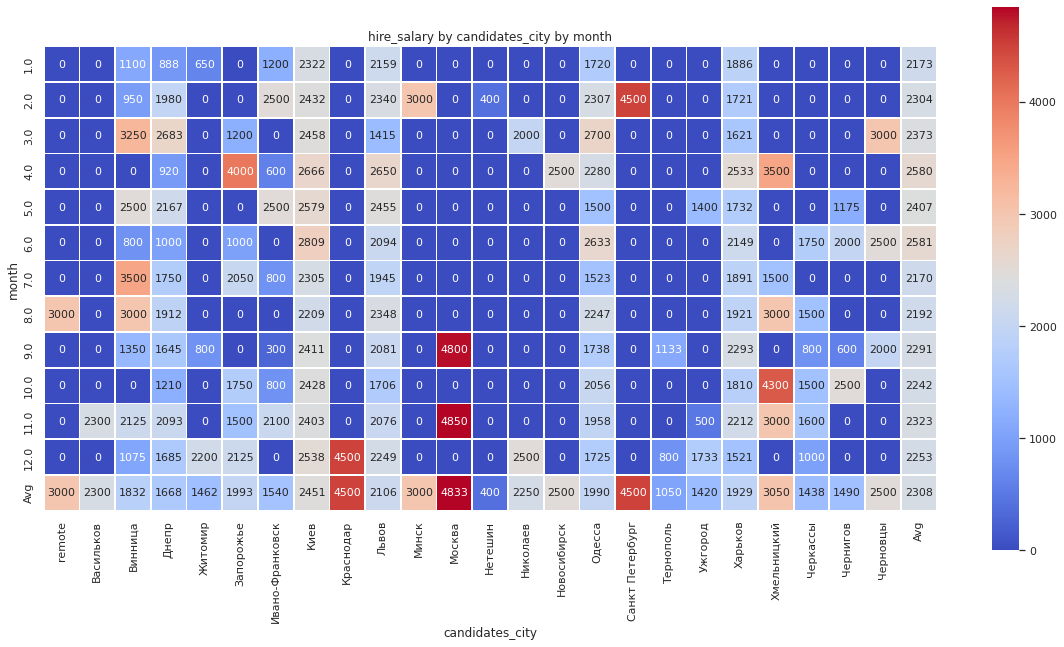

In [28]:
# using custiomer function from git
customer_function.printing_pivot_heatmap(df, "hire_salary", "month", "candidates_city")

У 2020 році найвищі середні зарплати були у Києві, найнижчі у Запоріжжі.

In [29]:
df['candidates_city'].unique()

array(['Киев', 'Харьков', 'Одесса', 'Днепр', 'Львов', 'Ивано-Франковск',
       'Винница', 'Житомир', 'Минск', 'Санкт Петербург', 'Нетешин',
       'Николаев', 'Черновцы', 'Запорожье', 'Новосибирск', 'Хмельницкий',
       'Чернигов', 'Ужгород', 'Черкассы', 'remote', 'Тернополь', 'Москва',
       'Васильков', 'Краснодар'], dtype=object)

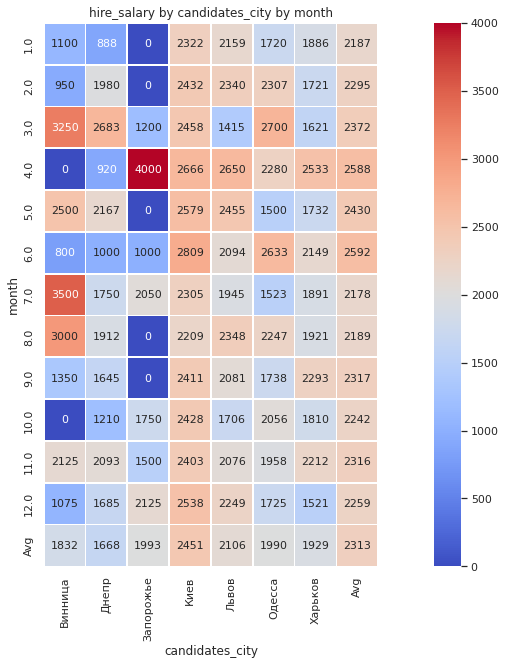

In [30]:
# using custiomer function from git for cities with every mounth data
df_hearmap_viz = df[(df['candidates_city']=='Киев') | (df['candidates_city']=='Запорожье') |  (df['candidates_city']=='Львов') | (df['candidates_city']=='Харьков') | \
                      (df['candidates_city']=='Одесса') | (df['candidates_city']=='Днепр') | (df['candidates_city']=='Винница')].copy()
customer_function.printing_pivot_heatmap(df_hearmap_viz, "hire_salary", "month", "candidates_city")

У 2020 році найвищі середні зарплати пропонували agency/freelance.

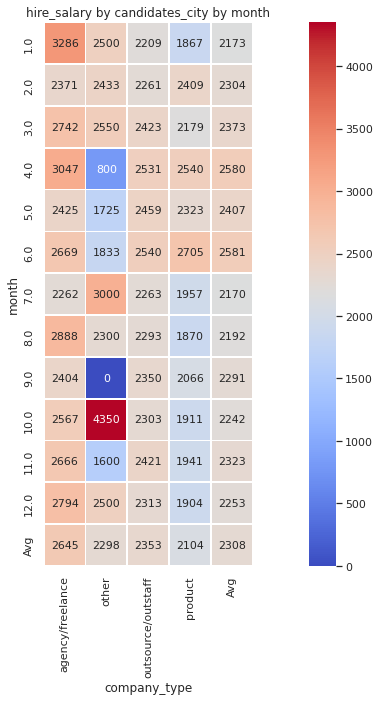

In [31]:
# using custiomer function from git
customer_function.printing_pivot_heatmap(df, "hire_salary", "month", "company_type")

У 2020 рік традиційно можна відмітити найвідчутнішу різницю середніх зарплат для кандидатів з досвідом 5 та більше років.

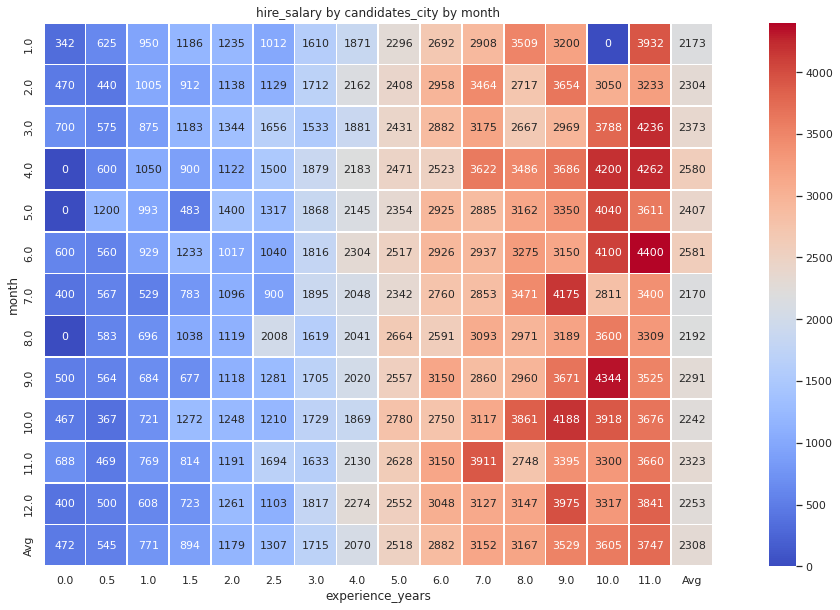

In [32]:
customer_function.printing_pivot_heatmap(df, "hire_salary", "month", "experience_years")

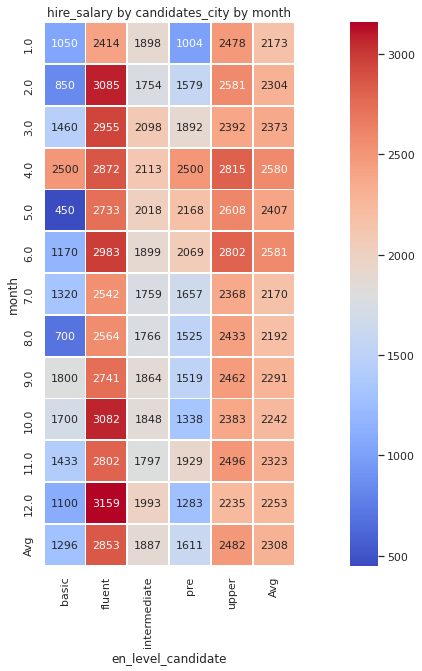

In [33]:
customer_function.printing_pivot_heatmap(df, "hire_salary", "month", "en_level_candidate")

### DataViz with facets

In [34]:
# start and end of energy and weather time series 
print("earliest time period:", df.index.min())
print("latest time period:", df.index.max())

earliest time period: 2020-01-01 10:13:25+00:00
latest time period: 2020-12-30 21:20:14.323059+00:00


Візуалізація розподілу змінних по місячним когортам

In [35]:
!pip install facets_overview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
cohort_1 = customer_function.create_cohort(df, '2020-01-01', '2020-01-31')
cohort_2 = customer_function.create_cohort(df, '2020-02-01', '2020-02-29')
cohort_3 = customer_function.create_cohort(df, '2020-03-01', '2020-03-31')
cohort_4 = customer_function.create_cohort(df, '2020-04-01', '2020-04-30')
cohort_5 = customer_function.create_cohort(df, '2020-05-01', '2020-05-31')
cohort_6 = customer_function.create_cohort(df, '2020-06-01', '2020-06-30')
cohort_7 = customer_function.create_cohort(df, '2020-07-01', '2020-07-31')
cohort_8 = customer_function.create_cohort(df, '2020-08-01', '2020-08-31')
cohort_9 = customer_function.create_cohort(df, '2020-09-01', '2020-09-30')
cohort_10 = customer_function.create_cohort(df, '2020-10-01', '2020-10-31')
cohort_11 = customer_function.create_cohort(df, '2020-11-01', '2020-11-30')
cohort_12 = customer_function.create_cohort(df, '2020-12-01', '2020-12-31')


# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'cohort_1', 'table': cohort_1},
                                  {'name': 'cohort_2', 'table': cohort_2},
                                  {'name': 'cohort_3', 'table': cohort_3},
                                  {'name': 'cohort_4', 'table': cohort_4},
                                  {'name': 'cohort_5', 'table': cohort_5},
                                  {'name': 'cohort_6', 'table': cohort_6},
                                  {'name': 'cohort_7', 'table': cohort_7},
                                  {'name': 'cohort_8', 'table': cohort_8},
                                  {'name': 'cohort_9', 'table': cohort_9},
                                  {'name': 'cohort_10', 'table': cohort_10},
                                  {'name': 'cohort_11', 'table': cohort_11},
                                  {'name': 'cohort_12', 'table': cohort_12}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

Візуалізація розподілу змінних по квартальним когортам

In [37]:
cohort_I = customer_function.create_cohort(df, '2020-01-01', '2020-03-31')
cohort_II = customer_function.create_cohort(df, '2020-04-01', '2020-06-30')
cohort_III = customer_function.create_cohort(df, '2020-07-01', '2020-09-30')
cohort_IV = customer_function.create_cohort(df, '2020-10-01', '2020-12-31')


# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'cohort_I', 'table': cohort_I},
                                  {'name': 'cohort_II', 'table': cohort_II},
                                  {'name': 'cohort_III', 'table': cohort_III},
                                  {'name': 'cohort_IV', 'table': cohort_IV}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

## Частина 2
На основі даних з першої частини написати sql-скрипт, який обчислюватиме:


---



1. Відсоток кандидатів, які змінювали роботу 2 чи більше рази у 2020-му році
**Відповідь:** Відсоток кандидатів, які змінювали роботу дорівнює 4.45%.


---



2. На скільки $$ в середньому зросли зарплати у таких кандидатів після зміни 

**Відповідь:** Для кандидатів, які змінювали роботу середні зміни: для першого найму - на 139 більше, для другого - на 99 менше, для третього - на 1180 більше.




---


3. Серед кандидатів, що змінювали роботу 2 чи більше рази - для якого відсотка кандидатів між двома наймами пройшло менше ніж 6 місяців

**Відповідь:** 

### Other

In [38]:
# treatment of outliers: replace with NaN, then interpolate
#df1["experience_years"].where( df1["experience_years"] <= 4, inplace=True)
#df1["experience_years"].where( df1["experience_years"] >= 4, inplace=True)
#df1["hire_salary"].where( df1["hire_salary"] <= 2000, inplace=True)
#df1["hire_salary"].where( df1["hire_salary"] >= 4000, inplace=True)
#df1 = df1.interpolate(method ="bfill")

#sns.boxplot(x=df1["experience_years"], palette="coolwarm")
#plt.show();
#sns.boxplot(x=df1["hire_salary"], palette="coolwarm")
#plt.show();

#df1.describe()

In [39]:
#
df_viz= pd.read_csv('test_task_for_data_analyst___data_sample_2022-08-18T21_20_07.621729Z.csv', parse_dates=["hire_reported"])
df_viz.drop('candidate_id', axis=1, inplace=True)
# drop the NaN and zero columns, and also the 'forecast' columns
df_viz = df_viz.drop(df_viz.filter(regex="forecast").columns, axis=1, errors="ignore")
df_viz.dropna(axis=1, how="all", inplace=True)
df_viz = df_viz.loc[:, (df_viz!=0).any(axis=0)]
# handle missing values in rows of remaining columns
df_viz = df_viz.interpolate(method ="bfill")

# datetime
df_viz["hire_reported"] = pd.to_datetime(df_viz["hire_reported"], utc=True, infer_datetime_format=True)
df_viz.set_index("hire_reported", inplace=True)
df_viz.sort_index(inplace=True)
df_viz["month"] = df_viz.index.month
df_viz = df_viz.astype({"month": float})
df_viz
# set the sprite_size based on the number of records in dataset,
# larger datasets can crash the browser if the size is too large (>50000)
sprite_size = 32 if len(df_viz.index)>50000 else 64

jsonstr = df_viz.to_json(orient='records')
# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = df_viz.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

In [40]:
select = ['primary_keyword_candidate', 'experience_years',  'hire_salary']
df_agg = df[select].copy()
df_agg.groupby(['primary_keyword_candidate'], sort=True).median(['experience_years', 'hire_salary'])

,experience_years,hire_salary
primary_keyword_candidate,,
.NET,5,"2,800"
Android,5,"2,700"
Business Analyst,5,"2,000"
C++,3,"1,400"
Data Analyst,3,900
Data Engineer,3,"1,750"
Data Science,4,"2,000"
Design,5,"1,500"
DevOps,5,"2,000"


THE END